trimesh para 3d - Rtree\
mahotas para 2d\
Open3d para registro\
pandas\
scipy\
sklearn - scikimage\
pywt: para transformada wavelet\
cv2: opencv manejo 3d/3d

#Correspondencia de La Forma

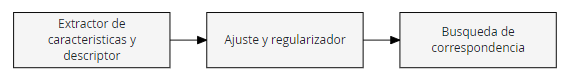



1. Carga de la malla: Comienza cargando uede ser una malla 3D de un objeto o una estructura.

2. Preprocesamiento de la malla: Realiza cualquier preprocesamiento necesario en la malla, como la eliminación de partes no deseadas o la simplificación de la geometría, si es necesario.

3. Extracción de descriptores: Calcula los descriptores de forma para cada vértice de la malla. Los descriptores de forma son características que capturan propiedades locales o globales de la forma (HKS y WKS son la común opcion)

4. Construcción de la matriz de correspondencia: Utilizando los descriptores de forma calculados, construye una matriz de correspondencia que mapee los vértices de una malla a los vértices de otra malla. Esta matriz captura la similitud entre los descriptores de forma de los vértices correspondientes. (funcional maps es la ppal opcion)

5. Optimización de la correspondencia: Aplica un algoritmo de optimización para encontrar la correspondencia óptima entre los vértices de ambas mallas. Esto implica encontrar una asignación que maximice la similitud de los descriptores de forma correspondientes. (ICP y ZOOMout son las ppal opciones)

6. Evaluación de la correspondencia: Evalúa la calidad de la correspondencia obtenida. Puedes utilizar medidas de error, como la distancia euclidiana entre los descriptores de forma correspondientes, para evaluar qué tan bien se ajusta la correspondencia.

7. Porcentaje de correspondencia: Finalmente, calcula el porcentaje de correspondencia entre las dos mallas. Esto se puede hacer comparando el número de correspondencias correctas con el número total de vértices en las mallas.

En el actual notebook nos centraremos en la extracción de caraacteristicas planteando varias tipos de descriptores y algunas regularizaciones, y quedando libres para pasar a la etapa de busqueda de correspondencias.

#Descriptores de forma 3D

1. Histograma de curvatura: Este descriptor cuantifica la curvatura en diferentes puntos de la superficie del objeto. Proporciona información sobre la forma local y la variación de la curvatura a lo largo de la superficie.

2. Histograma de características de forma: Este descriptor captura la distribución de diferentes características geométricas, como la esfericidad, la convexidad o la compacidad, en el objeto. Proporciona información sobre la forma global y la simetría del objeto.

3. Descriptores basados en firmas radiales: Estos descriptores calculan el perfil de características en diferentes radios alrededor del centro del objeto. Pueden incluir características como la curvatura media, el cambio de área o la distribución de puntos en función del radio.

4. Descriptores de Fourier: Estos descriptores se basan en la transformada de Fourier de la forma 3D del objeto. Capturan información sobre las frecuencias espaciales presentes en la superficie del objeto y se utilizan para describir características como la rugosidad o los detalles finos.

5. Descriptores de momentos invariantes: Estos descriptores calculan momentos geométricos invariantes a la escala, la rotación y la traslación del objeto. Proporcionan información sobre la distribución de masa del objeto y se utilizan para describir características como la simetría y la compacidad.

6. Descriptores de contorno basados en ángulos: Incluyen características como la cantidad de cambios de dirección en el contorno, la detección de puntos de inflexión o la cantidad de ángulos agudos o obtusos presentes en el contorno. Estos descriptores pueden proporcionar información sobre la forma y la suavidad del contorno.

7. Descriptores basados en esqueleto: Implican la extracción de un esqueleto o una representación simplificada del objeto tridimensional y el cálculo de características, como la longitud del esqueleto o el número de ramificaciones. Estos descriptores pueden ser útiles para capturar la estructura y la forma general del objeto.

8. Radio de giro: Es una medida de la distribución de masa alrededor de un eje. Se calcula como la raíz cuadrada de la suma de los momentos de inercia principales.

9. Descriptores de convexidad: Estos descriptores cuantifican la convexidad o la concavidad de un objeto tridimensional. Pueden incluir medidas como el volumen del envolvente convexo, el área de la superficie convexa, entre otros.

10. Descriptores de simetría: Estos descriptores evalúan la simetría del objeto tridimensional. Pueden incluir medidas como la simetría axial, la simetría esférica, la simetría planar, entre otros.

11. Descriptores de forma basados en transformadas: Estos descriptores utilizan transformadas matemáticas, como la transformada de Fourier, la transformada wavelet, entre otras, para extraer características de forma del objeto tridimensional.

12. Descriptores de morfología matemática: Estos descriptores se basan en operaciones de morfología matemática, como erosión, dilatación, apertura, cierre, para caracterizar la forma y la estructura del objeto tridimensional.

13. Descriptores de distribución de normales: Estos descriptores analizan la distribución de las normales de la superficie del objeto tridimensional. Pueden incluir medidas como la orientación media de las normales, la dispersión de las normales, entre otros.

14. Descriptores de histograma de gradientes: Estos descriptores cuantifican la distribución de los gradientes de la superficie del objeto tridimensional. Pueden incluir medidas como el histograma de orientaciones de gradiente, el histograma de magnitudes de gradiente, entre otros.

15. Descriptores de forma basados en puntos de interés: Estos descriptores se centran en puntos de interés clave en el objeto tridimensional, como crestas, valles o esquinas. Pueden incluir medidas como la detección y descripción de puntos de interés utilizando algoritmos 2d como SIFT (Scale-Invariant Feature Transform) o SURF (Speeded Up Robust Features),o 3d como Shot fphp.

16. Descriptores de forma basados en esferas mínimas: Estos descriptores utilizan esferas mínimas para describir la forma del objeto tridimensional. Pueden incluir medidas como el centro de la esfera mínima, el radio de la esfera mínima y la distancia promedio entre los puntos del objeto y la esfera mínima.

17. Descriptores de forma basados en modelos de superficie: Estos descriptores utilizan modelos de superficie paramétricos para describir la forma del objeto tridimensional. la representación de la superficie se hace mediante funciones polinómicas, funciones de base radial o splines.

18. Descriptores de forma basados en características de borde: Estos descriptores se centran en características de borde del objeto tridimensional. Pueden incluir medidas como la detección de bordes utilizando algoritmos como Canny, el análisis de la distribución de la orientación de los bordes, entre otros.

19. Descriptores de forma basados en análisis de puntos de muestreo: Estos descriptores utilizan puntos de muestreo distribuidos en la superficie del objeto tridimensional para caracterizar su forma. Pueden incluir medidas como la distancia promedio entre puntos de muestreo, la variabilidad de la distancia entre puntos de muestreo, entre otros.

20. Descriptores de forma basados en análisis de autovectores: Estos descriptores utilizan los autovectores de la matriz de covarianza de los puntos en la superficie del objeto tridimensional. Pueden incluir medidas como la orientación principal, la anisotropía, entre otros.

21. Descriptores de forma basados en redes neuronales: Estos descriptores utilizan redes neuronales para extraer características de forma del objeto tridimensional. Pueden incluir medidas como características aprendidas mediante redes neuronales convolucionales (CNN) aplicadas a volúmenes 3D o mallas 3D.

22. Descriptores Basados en carecterizacion y difusion HKS y WKS

In [1]:
!pip install trimesh
!pip install Rtree
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.5/689.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 4.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import trimesh
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## 1. Descriptor por Histograma de curvatura: hgauss,hmean=Hcurv(malla)

Es un descriptor de forma que cuantifica la curvatura en diferentes puntos de la superficie de un objeto tridimensional.
Proporciona información local y la variación de la curvatura a lo largo de la superficie.

\
Paso 1: Preprocesamiento

Selecciona un objeto tridimensional rpresentado en forma de nube de puntos o malla tridimensional.

\
Paso 2: Cálculo de la curvatura

Para cada punto de la superficie del objeto, calcula la curvatura local utilizando técnicas como el análisis de valores propios o el método de diferencias finitas.
La curvatura puede ser calculada en términos de curvatura media, curvatura gaussiana u otros tipos de curvatura según tus necesidades específicas.

\
Paso 3: Binning y creación del histograma

Divide el rango de valores de curvatura en un conjunto de intervalos o bins.
Para cada punto de la superficie, asigna el valor de curvatura al bin correspondiente en el histograma.
Incrementa el conteo de ese bin en una unidad.

\
Paso 4: Normalización

Normaliza el histograma dividiendo cada valor de bin por el número total de puntos de la superficie del objeto.
Esto asegura que el histograma represente una distribución de probabilidad relativa de curvaturas en el objeto.

\
Paso 5: Análisis y aplicación

Puedes examinar la forma del histograma para identificar patrones o tendencias en la curvatura.
Utiliza el histograma de curvatura como un descriptor de forma para clasificar, comparar o reconocer objetos basado en sus características de curvatura.


In [95]:
# Cargar el archivo de malla 3D
# malla = trimesh.load_mesh('path/to/mesh.obj')
def Hcurv(malla):
  # Generar una esfera icosaédrica
  # malla = trimesh.creation.icosahedron() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron

  # Obtener las coordenadas de los vértices
  vertices = malla.vertices
  # malla.show()

  # Paso 2: Cálculo de la curvatura
  # En este ejemplo, utilizaremos la curvatura media y gaussiana para diferentes radios

  radii = np.linspace(0.1, 2.0, 10)
  curvature_gauss = np.array([trimesh.curvature.discrete_gaussian_curvature_measure(malla, malla.vertices, r) for r in radii])
  curvature_mean = np.array([trimesh.curvature.discrete_mean_curvature_measure(malla, malla.vertices, r) for r in radii])
  # plt.figure()
  # plt.plot(radii, curvature_gauss.mean(axis=1))
  # plt.title('Gaussian Curvature')
  # plt.show()

  # plt.figure()
  # plt.plot(radii, curvature_mean.mean(axis=1))
  # plt.title('Mean Curvature')
  # plt.show();
  # Paso 3: Binning y creación del histograma
  num_bins = 30
  histgauss, bins = np.histogram(curvature_gauss, bins=num_bins) #curvature_mean

  # Paso 4: Normalización
  histgauss = histgauss / np.sum(histgauss)

  # Paso 5: Visualización del histograma
  # fig, ax = plt.subplots(1,2,1)
  # ax.bar(bins[:-1], histgauss, width=(bins[1]-bins[0]))
  # ax.set_xlabel('Curvature gauss')
  # ax.set_ylabel('Frequency')
  # plt.show()


  # Paso 3: Binning y creación del histograma
  histmean, bins = np.histogram(curvature_mean, bins=num_bins) #curvature_mean

  # Paso 4: Normalización
  histmean = histmean / np.sum(histgauss)

  # Paso 5: Visualización del histograma
  # fig, ax = plt.subplots(1,2,2)
  # ax.bar(bins[:-1], histmean, width=(bins[1]-bins[0]))
  # ax.set_xlabel('Curvature mean')
  # ax.set_ylabel('Frequency')
  # plt.show()


  return histgauss, histmean

hgauss,hmean=Hcurv(trimesh.creation.icosahedron())
print(hgauss,hmean)

[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.1] [12. 12. 12. 12.  0.  0. 12.  0.  0.  0.  0.  0. 12.  0.  0. 12.  0.  0.
 12.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0. 12.]


## 2. Descriptor por características de forma  df=CaractForm(malla)



 Este descriptor captura la distribución de diferentes características geométricas, como la esfericidad, la convexidad o la compacidad, en el objeto. Proporciona información sobre la forma global y la simetría del objeto.

 Area - Volumen - Compactness\
 Perímetro - Rugosidad\
 Circularidad - Esfericidad - Diametro -Excentricidad\
 Orientación - Momentos de inercia\
 Descriptores de Fourier 2d y 3s\
 Húmedad: Mide qué tan "recortado" o irregular es el contorno de un objeto. Cuanto mayor sea el número de entrantes y salientes en el contorno, mayor será la húmedad.

In [16]:
from scipy.fft import fftn
from scipy.ndimage import gaussian_filter
import pandas as pd

def CaractForm(malla):
  # Cargar el archivo de malla 3D
  # malla = trimesh.load_mesh('path/to/mesh.obj')

  # Generar una esfera icosaédrica
  # malla = trimesh.creation.icosahedron() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron

  # Calcular el volumen
  volumen = malla.volume

  # Calcular la Area
  area = malla.area

  # Calcular la esfericidad
  esfericidad = (np.pi**(1/3) * (6*volumen)**(2/3)) / area

  # Calcular la compactness
  compactness = area**3 / (36 * np.pi * volumen**2)

  # Calcular el perímetro
  perimetro = malla.bounding_box.bounds.sum() * 4

  # Calcular la rugosidad
  rugosidad = np.std(malla.vertices, axis=0).sum()

  # Calcular la circularidad
  circularidad = (4 * np.pi * area) / (perimetro**2)

  # Calcular el diámetro
  diametro = np.max(malla.extents)

  # Calcular la excentricidad
  excentricidad = np.max(malla.principal_inertia_components) / np.min(malla.principal_inertia_components)

  # Calcular la orientación
  orientacion = malla.principal_inertia_vectors

  # Calcular los momentos de inercia
  momentos_inercia = malla.moment_inertia

  # Calcular la humedad
  humedad = malla.bounding_box_oriented.volume / volumen

  # Obtener la matriz de conectividad de caras y vértices
  conectividad = malla.vertex_adjacency_graph
  # Calcular el número de vértices, caras y aristas
  num_vertices = len(malla.vertices)
  num_caras = len(malla.faces)
  num_aristas = len(conectividad.edges)
  # Calcular el número de Euler
  numero_euler = num_vertices - num_aristas + num_caras


  # Imprimir el resultado
  # print("Número de Euler:", numero_euler)

  # Imprimir los resultados
  # print("Área:", area)
  # print("Volumen:", volumen)
  # print("Compactness:", compactness)
  # print("Perímetro:", perimetro)
  # print("Rugosidad:", rugosidad)
  # print("Circularidad:", circularidad)
  # print("Esfericidad:", esfericidad)
  # print("Diámetro:", diametro)
  # print("Excentricidad:", excentricidad)
  # print("Humedad:", humedad)
  # print("Orientación:", orientacion)
  # print("Momentos de Inercia:", momentos_inercia)


  # Crear un diccionario con los resultados
  resultados = {
      "Medida": ["N. Euler","Área", "Volumen", "Compactness", "Perímetro", "Rugosidad", "Circularidad",
                "Esfericidad", "Diámetro", "Excentricidad", "Humedad", "Orientación",
                "Momentos de Inercia"],
      "Valor": [numero_euler,area, volumen, compactness, perimetro, rugosidad, circularidad,
                esfericidad, diametro, excentricidad, humedad, orientacion,
                momentos_inercia]
  }

  # Crear un DataFrame a partir del diccionario
  df = pd.DataFrame(resultados)
  return df
  # Imprimir la tabla

print(CaractForm(trimesh.creation.icosphere()))

<ipython-input-16-0cd9541f2c7c>:31: RuntimeWarning: divide by zero encountered in scalar divide
  circularidad = (4 * np.pi * area) / (perimetro**2)


                 Medida                                              Valor
0              N. Euler                                                  2
1                  Área                                          12.506493
2               Volumen                                           4.152741
3           Compactness                                           1.002962
4             Perímetro                                                0.0
5             Rugosidad                                           1.732051
6          Circularidad                                                inf
7           Esfericidad                                           0.999015
8              Diámetro                                                2.0
9         Excentricidad                                                1.0
10              Humedad                                           1.905901
11          Orientación  [[1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, ...
12  Momentos de Inercia  

## 3. Descriptores basados en firmas radiales

Capturan información de los perfiles radiales en múltiples direcciones alrededor de un objeto en tres dimensiones.

El proceso de cálculo de descriptores implica :

1. Selección de puntos de referencia: Se eligen puntos de referencia dentro del objeto tridimensional sobre los cuales se calcularán los perfiles radiales.

2. Cálculo de los perfiles radiales 3D: Para cada punto de referencia, se trazan múltiples líneas rectas en diferentes direcciones (por ejemplo, a lo largo de ángulos equidistantes en una esfera alrededor del objeto) y se registra la distancia y alguna propiedad asociada a lo largo de cada línea.

3. Normalización de los perfiles radiales: Se normalizan para eliminar las diferencias en tamaño o escala entre los objetos. Se puede utilizar la distancia máxima registrada en cada dirección como referencia para la normalización.

4. Extracción de características: A partir de los perfiles radiales  se pueden extraer diversas características que describen la forma y las propiedades del objeto tridimensional.
Estas características pueden incluir la longitud media de los perfiles en cada dirección, la variabilidad de las distancias registradas, la pendiente promedio en cada dirección, entre otras.

Los descriptores basados en firmas radiales 3D son especialmente útiles para capturar información detallada y direccional.


In [17]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import trimesh

# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.capsule() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron
# Obtener las coordenadas de los vértices de la malla
vertices = malla.vertices
# Número de puntos de referencia a seleccionar
num_reference_points = 100


#1.  Seleccionar puntos de referencia aleatorios
reference_points_indices = np.random.choice(len(vertices), num_reference_points)
reference_points = vertices[reference_points_indices]
# Ahora tienes los puntos de referencia seleccionados
# print(reference_points)

#2. Perfiles radiales
#Longitud máxima del perfil radial
max_radius = 1.0
# Número de pasos para discretizar el perfil
num_steps = 100
# Calcular los perfiles radiales para cada punto de referencia
radial_profiles = []
for point in reference_points:
    distances = np.linalg.norm(vertices - point, axis=1)
    profile = np.histogram(distances, bins=num_steps, range=(0, max_radius))[0]
    radial_profiles.append(profile)
# Ahora tienes los perfiles radiales para cada punto de referencia
# print(radial_profiles)


#3. Normalizar los perfiles radiales
normalized_profiles = []
for profile in radial_profiles:
    max_value = np.max(np.abs(profile))
    normalized_profile = profile / max_value
    normalized_profiles.append(normalized_profile)

# Ahora tienes los perfiles radiales normalizados
# print(normalized_profiles)


#4. caracteristicas
# Calcular los momentos estadísticos de los perfiles radiales normalizados
features = []
for profile in normalized_profiles:
    moments = np.array([np.mean(profile), np.std(profile)])
    features.append(moments)

# Ahora tienes las características extraídas de los perfiles radiales
# print(features)

# Crear un DataFrame de pandas para almacenar las características
df = pd.DataFrame(features, columns=['Media', 'Desviacion_Estandar'])

# Agregar una columna adicional para indicar el número de perfil
df['Perfil'] = range(1, num_reference_points + 1)

# # Guardar el DataFrame en un archivo CSV
# df.to_csv('tabla_caracteristicas.csv', index=False)
print(df)

       Media  Desviacion_Estandar  Perfil
0   0.213529             0.215435       1
1   0.341667             0.210140       2
2   0.243750             0.263020       3
3   0.205455             0.219549       4
4   0.445000             0.231643       5
..       ...                  ...     ...
95  0.341667             0.210140      96
96  0.326667             0.233106      97
97  0.304500             0.209535      98
98  0.348333             0.288526      99
99  0.348333             0.288526     100

[100 rows x 3 columns]


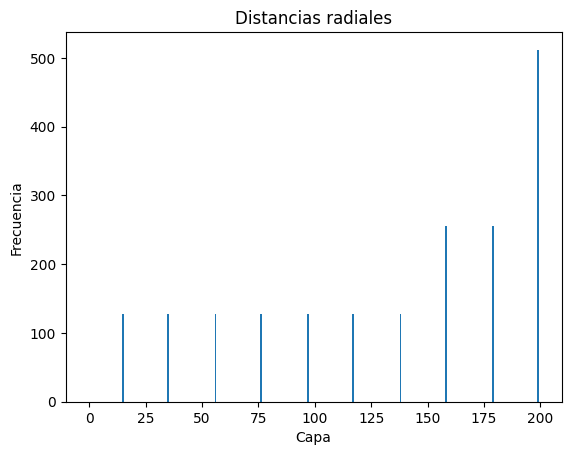

In [19]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt

def compute_radial_profiles(mesh, num_layers, num_bins):
    # Obtener el centroide de la malla
    centroid = mesh.centroid

    # Calcular la distancia desde cada vértice al centroide
    distances = np.linalg.norm(mesh.vertices - centroid, axis=1)

    # Dividir la distancia en capas concéntricas
    layers = np.linspace(distances.min(), distances.max(), num_layers + 1)

    # Calcular los perfiles radiales para cada capa
    radial_profiles = []
    for i in range(num_layers):
        # Seleccionar los vértices que se encuentran en la capa actual
        layer_vertices = mesh.vertices[(distances >= layers[i]) & (distances < layers[i+1])]

        # Calcular la distancia al centroide para estos vértices
        layer_distances = np.linalg.norm(layer_vertices - centroid, axis=1)

        # Calcular el histograma del perfil radial
        hist, bins = np.histogram(layer_distances, bins=num_bins, range=(0, distances.max()))
        radial_profiles.append(hist)

    return np.concatenate(radial_profiles)

# Cargar una malla 3D de ejemplo
mesh = trimesh.creation.capsule()

# Calcular el Histograma de Perfiles Radiales
num_layers = 10
num_bins = 20
rph = compute_radial_profiles(mesh, num_layers, num_bins)

# Visualizar el Histograma de Perfiles Radiales
plt.bar(range(len(rph)), rph)
plt.xlabel('Capa')
plt.ylabel('Frecuencia')
plt.title('Distancias radiales')
plt.show()

## 4. Decriptores de fourier 3D

El descriptor se puede aplicar para describir las características espaciales de la forma.
La forma tridimensional se representa como f(x, y, z), donde (x, y, z) son las coordenadas espaciales. Para aplicar el descriptor de Fourier, se deben seguir los siguientes pasos:

1. Muestreo: Para obtener un conjunto discreto de puntos que la aproximen. Estos puntos se pueden obtener a través de técnicas de escaneo 3D o mediante la discretización de una representación continua.

2. Transformada de Fourier: Se aplica la transformada de Fourier para convertir la información espacial en información de frecuencia. La transformada de Fourier tridimensional se define como:

$F(kx, ky, kz) = ∫∫∫ f(x, y, z) e ^ {-i(kxx + kyy + kz*z)} dx dy dz$

donde F(kx, ky, kz) es la representación en el dominio de la frecuencia y kx, ky, kz son las frecuencias espaciales.

3. Coeficientes de Fourier: Se obtienen los coeficientes de Fourier, que representan la contribución de cada frecuencia espacial a la forma tridimensional. Estos coeficientes se pueden calcular como:

$C(kx, ky, kz) = |F(kx, ky, kz)|$

donde $|F(kx, ky, kz)|$ es el valor absoluto de la transformada de Fourier.

4. Descriptores de Fourier: Finalmente, los descriptores se construyen utilizando los coeficientes de Fourier. Estos descriptores pueden ser obtenidos seleccionando un subconjunto de coeficientes de Fourier significativos o utilizando técnicas de reducción de dimensionalidad, como PCA (Análisis de Componentes Principales) o LDA (Análisis Discriminante Lineal).

Los descriptores de Fourier para formas tridimensionales proporcionan una representación compacta de las características espaciales de la forma y se utilizan en diversas aplicaciones, como el reconocimiento de objetos 3D, la clasificación de formas y la comparación de formas tridimensionales.

In [20]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.icosahedron() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron

# Paso 1: Muestreo del modelo tridimensional
points = malla.vertices  # Num_samples es el número de puntos de muestreo deseado
# Paso 2: Transformada de Fourier
transformed_points = np.fft.fftn(points)
# Paso 3: Coeficientes de Fourier
coefficients = np.abs(transformed_points)
# Paso 4: Descriptores de Fourier
# Generar el descriptor de forma
descriptor = np.linalg.norm(coefficients, axis=1)
descriptor /= np.max(descriptor)


print("Descriptor de forma:")
print(descriptor.shape)



# Plotear la malla con la representación de color según el descriptor HKS
malla.visual.vertex_colors = trimesh.visual.interpolate(descriptor.T, color_map='jet')
malla.show()


Descriptor de forma:
(12,)


## 5. Descriptor de momentos invariantes

Son técnicas utilizadas para describir mediante la extracción de características invariantes a la escala, traslación y rotación.

Estos descriptores se basan en los momentos estadísticos de una forma tridimensional. Aquí te presento algunos de los descriptores de momentos invariantes 3D más comunes:

1. Momentos de Hu 3D: Estos momentos se basan en los momentos estadísticos centralizados de una forma tridimensional. Son invariantes a traslación, rotación y escala y capturan características importantes como la forma, la simetría y la compacidad de la forma.

2. Momentos de Zernike 3D: Estos momentos se basan en la expansión de una forma tridimensional en polinomios de Zernike. Son invariantes a traslación y rotación y se utilizan para describir las propiedades globales y locales de la forma, como la concavidad, convexidad y orientación.

3. Momentos de Legendre 3D: Estos momentos se basan en la expansión de una forma tridimensional en polinomios de Legendre. Son invariantes a traslación, rotación y escala y se utilizan para describir las características geométricas y topológicas de la forma.

4. Momentos de Fourier-Mellin 3D: Estos momentos se basan en la transformada de Fourier-Mellin de una forma tridimensional. Son invariantes a traslación, rotación y escala y se utilizan para describir las características globales de la forma, como la forma general y la orientación.

5. Momentos de Hahn 3D: Estos momentos se basan en la expansión de una forma tridimensional en polinomios de Hahn. Son invariantes a traslación, rotación y escala y se utilizan para describir características geométricas y topológicas, como la convexidad, la compacidad y la relación de aspecto.

Estos son solo algunos ejemplos de descriptores de momentos invariantes 3D. Cada descriptor tiene sus propias características y propiedades, y la elección del descriptor adecuado depende del problema específico y las características que se deseen capturar de la forma tridimensional.

In [21]:
from scipy.special import genlaguerre, sph_harm

def calculate_hu_moments(mesh):
    # Obtener los puntos de la malla tridimensional
    points = mesh.vertices

    # Calcular el centroide de los puntos
    centroid = np.mean(points, axis=0)

    # Calcular la matriz de momentos de inercia
    points_centered = points - centroid
    inertia_matrix = np.dot(points_centered.T, points_centered)

    # Calcular los momentos de Hu 3D
    eigenvalues, _ = np.linalg.eig(inertia_matrix)
    hu_moments = -np.sort(-eigenvalues)  # Ordenar de mayor a menor

    return hu_moments

def calculate_zernike_moments(mesh, num_moments):
    # Muestreo de la malla tridimensional utilizando trimesh
    points, _ = trimesh.sample.sample_surface(mesh, num_moments)

    # Calcular los momentos de Zernike 3D
    zernike_moments = []
    for n in range(num_moments):
        zernike_moment = np.abs(sph_harm(0, n, points[:, 0], points[:, 1]))
        zernike_moments.append(np.mean(zernike_moment))

    return zernike_moments

def calculate_legendre_moments(mesh, num_moments):
    # Muestreo de la malla tridimensional utilizando trimesh
    points, _ = trimesh.sample.sample_surface(mesh, num_moments)

    # Calcular los momentos de Legendre 3D
    legendre_moments = []
    for n in range(num_moments):
        legendre_moment = np.abs(genlaguerre(n, 0)(points[:, 2]))
        legendre_moments.append(np.mean(legendre_moment))

    return legendre_moments

def calculate_fourier_mellin_moments(mesh, num_moments):
    # Muestreo de la malla tridimensional utilizando trimesh
    points, _ = trimesh.sample.sample_surface(mesh, num_moments)

    # Transformada de Fourier 3D
    fourier_transform = np.fft.fftn(points)

    # Transformada de Fourier-Mellin 3D
    fourier_mellin_moments = []
    for n in range(num_moments):
        fourier_mellin_moment = np.abs(fourier_transform[n])
        fourier_mellin_moments.append(np.mean(fourier_mellin_moment))

    return fourier_mellin_moments

def calculate_hahn_moments(mesh, num_moments):
    # Muestreo de la malla tridimensional utilizando trimesh
    points, _ = trimesh.sample.sample_surface(mesh, num_moments)

    # Calcular los momentos de Hahn 3D
    hahn_moments = []
    for n in range(num_moments):
        hahn_moment = np.abs(genlaguerre(n, 0)(2 * points[:, 2] - 1))
        hahn_moments.append(np.mean(hahn_moment))

    return hahn_moments

# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.capsule() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron


# Calcular los descriptores de momentos invariantes 3D para cada momento
hu_moments = calculate_hu_moments(malla)
zernike_moments = calculate_zernike_moments(malla, num_moments=10)
legendre_moments = calculate_legendre_moments(malla, num_moments=10)
fourier_mellin_moments = calculate_fourier_mellin_moments(malla, num_moments=10)
hahn_moments = calculate_hahn_moments(malla, num_moments=10)

# Imprimir los descriptores de momentos invariantes 3D
print("Hu 3D Moments:", hu_moments, hu_moments.shape)
print("Zernike 3D Moments:", zernike_moments, len(zernike_moments))
print("Legendre 3D Moments:", legendre_moments, len(legendre_moments))
print("Fourier-Mellin 3D Moments:", fourier_mellin_moments, len(fourier_mellin_moments))
print("Hahn 3D Moments:", hahn_moments, len(hahn_moments))


Hu 3D Moments: [2612.09427938  496.          496.        ] (3,)
Zernike 3D Moments: [0.2820947917738782, 0.3952698389865592, 0.3282000045876328, 0.3968075449830849, 0.38812662280824684, 0.28404273109477807, 0.3098301388322069, 0.4165112312988349, 0.40421436416259676, 0.31312444407389195] 10
Legendre 3D Moments: [1.0, 0.7681782204847187, 1.1271709004666697, 1.7683610766144806, 2.599163948874044, 3.7626581533542742, 5.488226511413781, 7.824460717465257, 10.976200821230796, 15.184898828061787] 10
Fourier-Mellin 3D Moments: [2.110354769141926, 3.318992215125949, 3.5540333412861247, 2.8006001788237853, 5.102016740710886, 2.1504652869768055, 5.102016740710886, 2.8006001788237853, 3.5540333412861247, 3.3189922151259488] 10
Hahn 3D Moments: [1.0, 2.2099635568646336, 5.431161145801195, 12.185900882344061, 25.85663987062791, 52.375820322303525, 101.69013921894282, 190.45659345241714, 345.93973064854924, 611.8931691741553] 10


## 6. Descriptores de Contorno basados en angulos

Algunos ejemplos de descriptores de contorno basados en ángulos:

Número de cambios de dirección: la cantidad de cambios de dirección en el contorno. Un cambio de dirección ocurre cuando hay un cambio significativo en el ángulo entre dos segmentos consecutivos del contorno. Este descriptor puede proporcionar información sobre la complejidad y la rugosidad del contorno.

Puntos de inflexión: Los puntos de inflexión son aquellos en los que la dirección del contorno cambia de manera significativa. Se pueden detectar analizando la segunda derivada del ángulo del contorno. Este descriptor captura la presencia de regiones curvas y puede ser útil para describir formas más complejas.

Histograma de ángulos: Este descriptor implica dividir el contorno en segmentos más pequeños y calcular el ángulo en cada segmento. Luego, se construye un histograma de los ángulos para representar la distribución angular del contorno. Este descriptor puede proporcionar información sobre la forma y la variabilidad de los ángulos en el contorno.

Ángulos agudos y obtusos: Estos descriptores cuentan la cantidad de ángulos agudos y obtusos presentes en el contorno. Un ángulo agudo es aquel que es menor de 90 grados, mientras que un ángulo obtuso es mayor de 90 grados. Estos descriptores pueden ser útiles para describir características específicas del contorno, como esquinas o formas curvas.

In [22]:
from skimage.measure import find_contours

# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.capsule() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron

# Obtener los puntos del contorno utilizando scikit-image
vertices = malla.vertices
contour = find_contours(vertices[:, :2], level=0.5)[0]  # Obtener el primer contorno en 2D

# Calcular los descriptores de contorno basados en ángulos
contour_diff = np.diff(contour, axis=0)  # Diferencia entre puntos consecutivos
num_changes = len(np.where(np.linalg.norm(contour_diff, axis=1) > 0.001)[0])  # Número de cambios de dirección

contour_diff2 = np.diff(contour_diff, axis=0)  # Diferencia entre diferencias consecutivas
num_inflections = len(np.where(np.linalg.norm(contour_diff2, axis=1) > 0.001)[0])  # Número de puntos de inflexión

histogram, _ = np.histogram(np.arctan2(contour_diff[:, 1], contour_diff[:, 0]), bins=10, range=(-np.pi, np.pi))  # Histograma de ángulos


# Calcular los descriptores de contorno basados en ángulos agudos y obtusos
angles = np.arctan2(np.diff(contour[:, 1]), np.diff(contour[:, 0]))  # Calcular los ángulos entre segmentos consecutivos
# Convertir los ángulos a grados
angles_deg = np.degrees(angles)
# Contar los ángulos agudos y obtusos
num_acute = len(np.where(angles_deg < 90)[0])  # Número de ángulos agudos
num_obtuse = len(np.where(angles_deg > 90)[0])  # Número de ángulos obtusos

# Imprimir los descriptores
print("Número de cambios de dirección:", num_changes)
print("Número de puntos de inflexión:", num_inflections)
print("Histograma de ángulos:", histogram)
print("Número de ángulos agudos y obtusos :", num_acute, num_obtuse)

Número de cambios de dirección: 21
Número de puntos de inflexión: 20
Histograma de ángulos: [ 0  0  0  0 10 11  0  0  0  0]
Número de ángulos agudos y obtusos : 21 0


In [23]:
# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.icosahedron() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron


# Calcular las normales en cada punto de la malla
normals = malla.vertex_normals

# Definir un umbral de cambio de ángulo para identificar crestas y valles
umbral_angulo = np.pi / 6  # 30 grados

# Almacenar las aristas correspondientes a crestas y valles
crestas = []
valles = []

# Iterar sobre las aristas de la malla
for arista in malla.edges_unique:
    # Obtener los índices de los vértices de la arista
    indice_vertice_1, indice_vertice_2 = arista

    # Calcular el ángulo entre las normales de los vértices adyacentes
    angulo = np.arccos(np.dot(normals[indice_vertice_1], normals[indice_vertice_2]))

    # Comparar el ángulo con el umbral para determinar si es cresta o valle
    if angulo > umbral_angulo:
        crestas.append(arista)
    elif angulo < -umbral_angulo:
        valles.append(arista)

# Imprimir las aristas correspondientes a crestas y valles
print("Crestas:", crestas)
print("Valles:", valles)


Crestas: [array([0, 1]), array([2, 3]), array([2, 4]), array([3, 4]), array([0, 5]), array([1, 5]), array([4, 5]), array([2, 6]), array([3, 6]), array([0, 7]), array([1, 7]), array([6, 7]), array([1, 8]), array([3, 8]), array([6, 8]), array([7, 8]), array([1, 9]), array([3, 9]), array([4, 9]), array([5, 9]), array([8, 9]), array([ 0, 10]), array([ 2, 10]), array([ 6, 10]), array([ 7, 10]), array([ 0, 11]), array([ 2, 11]), array([ 4, 11]), array([ 5, 11]), array([10, 11])]
Valles: []


## 7. Descriptores basados en esqueleto (Zhang-Suen algoritmo, binariazcion y borde)

Son útiles para capturar la estructura y la forma general. Estos descriptores se obtienen extrayendo un esqueleto o una representación simplificada del objeto y luego calculando diversas características relacionadas con el esqueleto. Algunas de las características comunes que se pueden calcular son:

Longitud del esqueleto: Es la longitud total y Se calcula sumando las longitudes de todas las ramificaciones del esqueleto.

Número de ramificaciones: Es el número total de ramificaciones o bifurcaciones presentes en el esqueleto del objeto. Puede proporcionar información sobre la complejidad y la estructura del objeto.

Espesor promedio: Es el promedio de los diámetros o grosores de las ramificaciones del esqueleto. Se puede calcular midiendo el diámetro en diferentes puntos a lo largo de cada rama y luego tomando el promedio.

Longitud de ramificaciones principales: Son las longitudes de las ramificaciones principales del esqueleto.

Ángulos de bifurcación: Se pueden calcular midiendo los ángulos entre las ramas que se bifurcan.

Centroides de ramas: Son las coordenadas del centroide de cada rama del esqueleto. Los centroides proporcionan información sobre la distribución espacial de las ramificaciones.

Existen diferentes algoritmos y técnicas para extraer el esqueleto de un objeto tridimensional, como el esqueleto 3D de Zhang-Suen o el esqueleto de voxels.


In [24]:
from skimage.morphology import skeletonize_3d
from skimage.measure import label, regionprops

# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.capsule() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron


# Convertir el modelo a una representación de volumen binario
volume = malla.voxelized(0.1)  # Ajusta el tamaño de voxel según tus necesidades
voxels = volume.matrix > 0

# Aplicar el algoritmo de esqueletonización 3D de Scikit-image
skeleton = skeletonize_3d(voxels)

# Etiquetar los componentes conectados en el esqueleto
labeled_skeleton = label(skeleton)

# Obtener las coordenadas de los puntos del esqueleto
coords =  np.array(skeleton.nonzero())

# Calcular las características de los componentes etiquetados
props = regionprops(labeled_skeleton)

# Calcular los descriptores basados en esqueleto
longitud_esqueleto = sum([prop.major_axis_length for prop in props])
num_ramificaciones = len(props)
espesor_promedio = sum([prop.equivalent_diameter for prop in props]) / num_ramificaciones

angulos_bifurcacion = []
centroides_ramas = []
for prop in props:
    coords = prop.coords
    if len(coords) > 2:
        angles = np.arctan2(coords[1:, 1] - coords[:-1, 1], coords[1:, 0] - coords[:-1, 0])
        angle_diffs = np.diff(angles)
        bifurcation_angles = angle_diffs[angle_diffs > 0.1]  # Ajusta el umbral según tus necesidades
        angulos_bifurcacion.extend(bifurcation_angles)
        centroides_ramas.append(np.mean(coords, axis=0))

num_angulos_bifurcacion = len(angulos_bifurcacion)

# Imprimir los descriptores
print("Longitud del esqueleto:", longitud_esqueleto)
print("Número de ramificaciones:", num_ramificaciones)
print("Espesor promedio:", espesor_promedio)
print("Número de ángulos de bifurcación:", num_angulos_bifurcacion)
print("Centroides de ramas:", centroides_ramas)


Longitud del esqueleto: 37.84651148523358
Número de ramificaciones: 1
Espesor promedio: 14.517370582942755
Número de ángulos de bifurcación: 344
Centroides de ramas: [array([10.        , 10.30461923, 14.99250936])]


## 8. Descriptores por radio de giro

Miden el cambio de dirección o curvatura en diferentes puntos de la forma y proporcionan información sobre la forma local y global del objeto. Algunos descriptores comunes basados en el radio de giro incluyen:

Radio de giro promedio: Calcula el radio de giro promedio de la forma en cada punto. El radio de giro se define como la inversa de la curvatura en ese punto. El radio de giro promedio proporciona una medida de la suavidad o rugosidad de la forma.

Curvatura media: Calcula la curvatura media de la forma en cada punto. La curvatura media se define como la magnitud de la derivada segunda de la posición del punto en relación con la longitud de arco. La curvatura media proporciona información sobre la curvatura local de la forma.

Radio de giro máximo y mínimo: Calcula el radio de giro máximo y mínimo en cada punto. Estos descriptores proporcionan información sobre las regiones más curvas y las regiones más planas de la forma.

Radio de giro principal: Calcula los radios de giro principales en cada punto, que representan las direcciones principales de curvatura. Estos descriptores son útiles para capturar la forma y la orientación de la curvatura en diferentes direcciones.


In [25]:
from trimesh.curvature import discrete_gaussian_curvature_measure
#Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.capsule() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron

# Calcular la curvatura en cada punto
radii = np.linspace(0.1, 2.0, 10)
# curvatura = np.array([trimesh.curvature.discrete_gaussian_curvature_measure(malla, malla.vertices, r) for r in radii]) #gauss
curvatura = np.array([trimesh.curvature.discrete_mean_curvature_measure(malla, malla.vertices, r) for r in radii]) #mean

# Calcular el radio de giro promedio
radio_giro_promedio = 1 / curvatura.mean()

# Calcular el radio de giro máximo y mínimo
radio_giro_maximo = 1 / curvatura.max()
radio_giro_minimo = 1 / curvatura.min()

In [26]:
# Obtener las normales de los vértices de la malla
normales = malla.vertex_normals

# Calcular la matriz de curvatura usando las normales de los vértices
matriz_curvatura = np.dot(normales.T, normales)

# Calcular los valores propios de la matriz de curvatura
valores_propios = np.linalg.eigvalsh(matriz_curvatura)

# Imprimir los valores propios
print("Valores propios:", valores_propios)
radio_giro_principal_1 = 1 / valores_propios.max()
radio_giro_principal_2 = 1 / valores_propios.min()

Valores propios: [496.6641905 496.6641905 928.671619 ]


In [27]:
# Imprimir los descriptores de radio de giro
print("Radio de giro promedio:", radio_giro_promedio)
print("Radio de giro máximo:", radio_giro_maximo)
print("Radio de giro mínimo:", radio_giro_minimo)
print("Radio de giro principal 1:", radio_giro_principal_1)
print("Radio de giro principal 2:", radio_giro_principal_2)

Radio de giro promedio: 0.2598469534187364
Radio de giro máximo: 0.08717539577153309
Radio de giro mínimo: 62.795667791163915
Radio de giro principal 1: 0.0010768068922730309
Radio de giro principal 2: 0.002013432856907946


## 9. Descriptores de Convexidad

Medidas que se utilizan para caracterizar la forma y la convexidad de un objeto tridimensional.
Estos descriptores se basan en propiedades geométricas del objeto y pueden ser útiles en diversas aplicaciones, como reconocimiento de formas, segmentación de objetos y análisis de superficies.

Aquí hay algunos descriptores de convexidad comunes en 3D:

Volumen convexo: Es el volumen del envolvente convexo del objeto, que es el menor poliedro convexo que contiene completamente al objeto.

Superficie convexa: Es el área de la superficie del envolvente convexo del objeto.

Índice de convexidad: Es una medida que compara el volumen o área del objeto con el volumen o área del envolvente convexo. Se calcula como la relación entre el volumen o área del objeto y el volumen o área del envolvente convexo.

Profundidad convexa: Es la máxima distancia entre cualquier punto en la superficie del objeto y la envolvente convexa.

Rugosidad convexa: Es una medida de la irregularidad de la superficie del objeto en comparación con la envolvente convexa. Se calcula como la diferencia entre el área del objeto y el área de la envolvente convexa.


In [28]:
# Cargar la malla 3D usando Trimesh
malla = trimesh.creation.capsule()

# Calcular el volumen convexo
volumen_convexo = malla.convex_hull.volume

# Calcular el área de la superficie convexa
area_superficie_convexa = malla.convex_hull.area

# Calcular el índice de convexidad
indice_convexidad = malla.volume / volumen_convexo

# Calcular la profundidad convexa
profundidad_convexa = malla.convex_hull.extents.max()

# Calcular la rugosidad convexa
rugosidad_convexa = area_superficie_convexa - malla.area

# Imprimir los resultados
print("Volumen convexo:", volumen_convexo)
print("Área de la superficie convexa:", area_superficie_convexa)
print("Índice de convexidad:", indice_convexidad)
print("Profundidad convexa:", profundidad_convexa)
print("Rugosidad convexa:", rugosidad_convexa)


Volumen convexo: 7.299838425974788
Área de la superficie convexa: 18.812763196281875
Índice de convexidad: 1.0
Profundidad convexa: 3.0
Rugosidad convexa: 3.552713678800501e-15


## 10. Descriptores de simetria

Medidas que evalúan la simetría de un objeto tridimensional

Centroide:el centro geométrico del objeto

Plano de simetría: que divide el objeto en dos partes simétricas. Puedes calcular el plano de simetría utilizando el análisis de componentes principales de los puntos de la malla y tomando el vector propio correspondiente al valor propio más pequeño.

Coeficiente de simetría axial: evalúa la similitud entre los puntos del objeto a lo largo de un eje de simetría. Puedes calcularlo comparando las distancias entre los puntos en un lado del eje de simetría con los puntos correspondientes en el otro lado.

Coeficiente de simetría radial: mide la similitud entre los puntos del objeto en diferentes radios alrededor del un punto central. Puedes calcularlo comparando las distancias entre los puntos en un radio con los puntos correspondientes en el radio opuesto.

In [29]:
# Cargar la malla 3D usando Trimesh
malla = trimesh.creation.capsule()

centroide = malla.centroid

puntos_izquierda = malla.vertices[malla.vertices[:, 0] < centroide[0]]
puntos_derecha = malla.vertices[malla.vertices[:, 0] > centroide[0]]
# Asegurarse de que las matrices tengan la misma longitud
min_length = min(len(puntos_izquierda), len(puntos_derecha))
puntos_izquierda = puntos_izquierda[:min_length]
puntos_derecha = puntos_derecha[:min_length]
coeficiente_simetria_axial = np.mean(np.linalg.norm(puntos_izquierda - puntos_derecha, axis=1))

# Calcula las distancias de cada punto al centroide
puntos = malla.vertices
distancias = np.linalg.norm(puntos - centroide, axis=1)
# Calcula el coeficiente de simetría radial
coeficiente_simetria_radial = np.mean(distancias)


# Ajusta la malla al origen
puntosd = malla.vertices - centroide
# Calcula el plano de simetría utilizando mínimos cuadrados
A = np.column_stack((puntosd[:, 0], puntosd[:, 1], np.ones_like(puntosd[:, 0])))
_, _, V = np.linalg.svd(A)
vector_simetria = V[-1, :]


# Imprime el resultado
print("Coeficiente de simetría axial:", coeficiente_simetria_axial)
print("Coeficiente de simetría radial:", coeficiente_simetria_radial)
print("Vector de simetría del plano:", vector_simetria)

Coeficiente de simetría axial: 1.398345267974718
Coeficiente de simetría radial: 1.364593129392504
Vector de simetría del plano: [-1. -0. -0.]


## 11. Descriptores de transformadas

Son técnicas utilizadas para extraer características de forma de un objeto en una imagen o malla tridimensional. Algunos descriptores de forma basados en transformadas comunes incluyen:

Descriptores de Fourier: Utilizan la transformada de Fourier para analizar las frecuencias espaciales presentes en la forma del objeto.

Descriptores de Wavelet: Utilizan transformadas de wavelet para analizar características a diferentes escalas y orientaciones en la forma del objeto.

Descriptores de Transformada de Distancia: Utilizan la transformada de distancia para medir la distancia de cada punto en el objeto a la frontera del objeto. Estos descriptores son útiles para capturar la forma y la convexidad del objeto.

Descriptores de Autocorrelación: Utilizan la autocorrelación para analizar patrones repetitivos y simetrías en la forma del objeto.



In [30]:
from scipy.signal import fftconvolve
from scipy.spatial import distance


# Cargar la malla 3D usando Trimesh
malla = trimesh.creation.capsule()

# Obtener los vértices de la malla
vertices = malla.vertices


# Calcular la transformada de Fourier de los vértices
transformada = np.fft.fft(vertices)
# Obtener los coeficientes de Fourier
coeficientes = np.abs(transformada)
# Imprimir los coeficientes de Fourier
print("coeficientes de fourier: ",coeficientes)



# Calcular la matriz de autocorrelación utilizando numpy y scipy
corr_matrix = fftconvolve(vertices, np.flip(vertices, axis=0), mode='same')
# Obtener los descriptores de forma basados en Autocorrelación
autocorrelacion = np.sum(corr_matrix, axis=1)
# Imprimir la autocorrelación
print("autocorrelación: ",autocorrelacion)


# Calcular la matriz de distancias utilizando Scipy
dist_matrix = distance.cdist(vertices, vertices)

# Obtener los descriptores de Transformada de Distancia
descriptor = np.sum(dist_matrix, axis=1)

# Imprimir los descriptores de Transformada de Distancia
print("descriptor de transformada de distancia",descriptor)

coeficientes de fourier:  [[1.5        1.5        1.5       ]
 [1.393701   1.54793499 1.54793499]
 [1.27823142 1.58976638 1.58976638]
 ...
 [1.72271815 1.34993703 1.34993703]
 [1.66012845 1.40224166 1.40224166]
 [1.58563426 1.45264792 1.45264792]]
autocorrelación:  [-154.72763875 -252.4230824  -347.40208267 ... -426.47233972 -347.40208267
 -252.4230824 ]
descriptor de transformada de distancia [3361.89606195 3363.22481947 3367.60584969 ... 3372.97918851 3367.60584969
 3363.22481947]


In [68]:
import pywt

#https://notebook.community/taspinar/siml/notebooks/WV1%20-%20Using%20PyWavelets%20for%20Wavelet%20Analysis

# Cargar la malla 3D usando Trimesh
malla = trimesh.creation.capsule()
vertices = malla.vertices

# Descomponer las coordenadas de los vértices en cada dimensión utilizando PyWavelets
descriptors = []
for dim in range(3):
    coords = vertices[:, dim]
    coeffs = pywt.wavedec(coords, wavelet='db3', mode='symmetric', level=None, axis=-1)  # Ajusta el wavelet y nivel según tus necesidades
    # print(np.array(coeffs))
    for level in range(3):
        level_coeffs = coeffs[level]
        # print(len(level_coeffs))
        descriptors.append(np.array(level_coeffs).reshape(-1))


import numpy as np

# Rellenar los arrays para que tengan la misma longitud
max_length = max(len(arr) for arr in descriptors)
descriptors_padded = [np.pad(arr, (0, max_length - len(arr)), mode='constant') for arr in descriptors]

# Convertir la lista de arrays en un solo array de NumPy
descriptors_np = np.array(descriptors_padded)

# Imprimir los descriptores
print("Descriptores wavelet 3D:")
print(descriptors_np)

# # Plotear la malla con la representación de color según el descriptor HKS
# malla.visual.vertex_colors = trimesh.visual.interpolate(descriptors_np, color_map='jet')
# malla.show()


Descriptores wavelet 3D:
[[ 2.74091665e+00  2.73062957e+00  1.68696868e+00  5.82498019e+00
   8.35300045e+00  8.54778320e-01 -7.22029018e+00 -1.05013085e+01
  -6.80791303e+00  1.33191489e+00  8.11844838e+00  7.47846575e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.34894974e-02 -1.35699804e+00  2.09180499e+00 -6.71337456e-01
  -2.80425292e-01 -1.99306008e-01  2.55223000e-02  2.45841296e-01
  -9.34226202e-02 -1.76209463e+00  2.62457720e+00 -6.56604547e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.06186656e-03 -1.06551619e+00  1.25418596e+00 -3.54406257e-01
  -1.97973515e-02 -2.78301879e-02 -2.39165551e-02 -2.57918942e-02
  -2.04053187e-02 -1.96231460e-03  3.37314547e-03  1.31884776e-02
   2.35165189e-02  2.56398332e-02  2.36773768e-02  5.68213752e-02
   1.44604715e+00 -1.20612677e+00 -2.45894430e-01]
 [-1.69726954e-02 -1.60333283e

## 12. Descriptor de morfologia matematica

Se basan en operaciones de morfología matemática, como erosión, dilatación, apertura, cierre, para caracterizar la forma y la estructura del objeto tridimensional.

In [69]:
import trimesh
from scipy.ndimage import binary_erosion, binary_dilation
from skimage.morphology import opening, closing

# Cargar la malla 3D usando Trimesh
malla = trimesh.creation.capsule()

# Convertir la malla a una representación de volumen binario
vol_binario = malla.voxelized(0.1).matrix > 0

# Realizar erosión y dilatación en el volumen binario
erosionado = binary_erosion(vol_binario)
dilatado = binary_dilation(vol_binario)

# Realizar apertura y cierre en el volumen binario
apertura = opening(vol_binario)
cierre = closing(vol_binario)

# Calcular el volumen de los resultados de las operaciones
volumen_erosionado = erosionado.sum()
volumen_dilatado = dilatado.sum()
volumen_apertura = apertura.sum()
volumen_cierre = cierre.sum()

# Imprimir los resultados
print("Volumen erosionado:", volumen_erosionado)
print("Volumen dilatado:", volumen_dilatado)
print("Volumen apertura:", volumen_apertura)
print("Volumen cierre:", volumen_cierre)


Volumen erosionado: 56
Volumen dilatado: 5292
Volumen apertura: 424
Volumen cierre: 2810


## 13. Descriptores de distribución de normales

Pueden incluir medidas como la orientación media de las normales, la dispersión de las normales, entre otros.

In [70]:
# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.icosphere() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron

normales_cara = malla.face_normals
normales_vertice = malla.vertex_normals

# Orientación media de las normales
orientacion_media = np.mean(normales_vertice, axis=0)

# Dispersión de las normales
dispersion = np.std(normales_vertice, axis=0)
print("Orientación media de las normales:", orientacion_media)
print("Dispersión de las normales:", dispersion)



Orientación media de las normales: [1.10676439e-17 2.76691096e-18 1.66014658e-17]
Dispersión de las normales: [0.57735027 0.57735027 0.57735027]


## 14. Descriptores de histograma por gradientes

Calcular los gradientes en cada punto de la superficie del objeto tridimensional.

Calcular la magnitud y dirección del gradiente en cada punto. Puedes utilizar las componentes del gradiente en cada eje (x, y, z) para calcular la magnitud y la dirección utilizando funciones trigonométricas.

Dividir el rango de magnitudes y direcciones en un número determinado de bins o intervalos.

Para cada punto de la malla, incrementar el contador correspondiente al bin o intervalo al que pertenece su magnitud y dirección del gradiente.

Normalizar los contadores del histograma dividiéndolos por el número total de puntos de la malla.


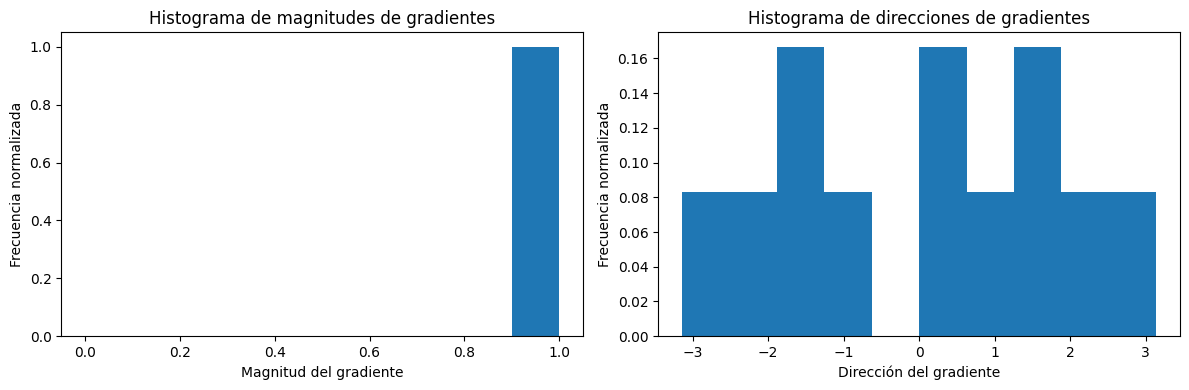

In [71]:
# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.icosahedron() #.capsule #.icosphere() #.box()  .annulus .cone .cylinder .extrude_triangulation .random_soup .icosahedron


# Obtener las normales de los triángulos de la malla
normales = malla.vertex_normals

# Calcular la magnitud y dirección del gradiente en cada punto
magnitudes = np.linalg.norm(normales, axis=1)
direcciones = np.arctan2(normales[:, 1], normales[:, 0])

# Definir el número de bins para el histograma
num_bins = 10

# Calcular el histograma de magnitudes
hist_magnitudes, bins_magnitudes = np.histogram(magnitudes, bins=num_bins, range=(0, np.max(magnitudes)))

# Calcular el histograma de direcciones
hist_direcciones, bins_direcciones = np.histogram(direcciones, bins=num_bins, range=(-np.pi, np.pi))

# Normalizar los histogramas
hist_magnitudes = hist_magnitudes / len(magnitudes)
hist_direcciones = hist_direcciones / len(direcciones)

# Visualizar los histogramas
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(bins_magnitudes[:-1], hist_magnitudes, width=np.diff(bins_magnitudes), align='edge')
plt.xlabel('Magnitud del gradiente')
plt.ylabel('Frecuencia normalizada')
plt.title('Histograma de magnitudes de gradientes')

plt.subplot(1, 2, 2)
plt.bar(bins_direcciones[:-1], hist_direcciones, width=np.diff(bins_direcciones), align='edge')
plt.xlabel('Dirección del gradiente')
plt.ylabel('Frecuencia normalizada')
plt.title('Histograma de direcciones de gradientes')

plt.tight_layout()
plt.show()

## 15. Descriptors Basados en puntos de interes

 Estos descriptores se centran en puntos de interés clave en el objeto tridimensional, como crestas, valles o esquinas.
\
Para 2d:
SIFT (Scale-Invariant Feature Transform)
SURF (Speeded Up Robust Features)
ISS (Intrinsic Shape Signatures)
\
Para 3d:
\
SHOT (Signature of Histograms of Orientations)
\
FPFH (Fast Point Feature Histograms).

In [72]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [73]:
import open3d as o3d
import cv2
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import cKDTree


# Cargar la malla 3D usando Trimesh
# malla = trimesh.load('path_to_mesh.obj')
# Generar una esfera icosaédrica
malla = trimesh.creation.capsule()

# Obtener los puntos de la malla como una nube de puntos
nube_puntos = o3d.geometry.PointCloud()
nube_puntos.points = o3d.utility.Vector3dVector(malla.vertices)

# Estimar las normales en la nube de puntos
nube_puntos.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

# Imprimir las normales estimadas
# print(nube_puntos.normals)

# Configurar los parámetros para el cálculo de los descriptores FPFH
radius_feature = 0.1  # Radio para calcular las características FPFH
radius_search = 0.5  # Radio para buscar vecinos cercanos

# Calcular los descriptores FPFH
fpfh = o3d.pipelines.registration.compute_fpfh_feature(nube_puntos, o3d.geometry.KDTreeSearchParamRadius(radius_search))

# Obtener los descriptores FPFH como un arreglo numpy
descriptores_fpfh = np.asarray(fpfh.data)

# Imprimir los descriptores FPFH
print("Descriptores fpfh: ",len(descriptores_fpfh))



# Extract the surface normals from the mesh
normals = malla.vertex_normals

# Compute the SHOT descriptor
k = 20  # Number of neighbors for feature computation
radius = 0.1  # Radius for neighborhood search

# Build a KD-tree for efficient nearest neighbor search
tree = cKDTree(malla.vertices)

# Compute the nearest neighbors for each vertex
_, indices = tree.query(malla.vertices, k=k+1)  # +1 to exclude the vertex itself

descriptors = []

# Iterate over each vertex and compute the SHOT descriptor
for i, vertex in enumerate(malla.vertices):
    neighbors = malla.vertices[indices[i][1:]]  # Exclude the first neighbor (the vertex itself)
    neighbor_normals = normals[indices[i][1:]]

    # Compute the relative positions and angles
    relative_positions = neighbors - vertex
    angles = np.arctan2(relative_positions[:, 1], relative_positions[:, 0])

    # Compute the SHOT histogram
    histogram, _ = np.histogram(angles, bins=10, range=(-np.pi, np.pi), weights=neighbor_normals[:, 2])
    histogram /= np.sum(histogram)

    descriptors.append(histogram)

descriptors = np.array(descriptors)

# Normalize the descriptors
descriptors /= np.linalg.norm(descriptors, axis=1, keepdims=True)

# Print the computed descriptors
print("Descriptores Shot: ",len(descriptors))


Descriptores fpfh:  33
Descriptores Shot:  1922


## 16. Descriptores basados en esferes minimas

Se utilizan para caracterizar la forma de un objeto tridimensional mediante la estimación de la esfera mínima que puede contener completamente al objeto. Estos descriptores pueden incluir medidas como el centro de la esfera, el radio de la esfera y la relación entre el volumen del objeto y el volumen de la esfera mínima.

In [78]:
# Cargar la malla 3D utilizando trimesh
malla = trimesh.creation.capsule()

# Calcular la esfera mínima que envuelve completamente la malla
esfera_minima = malla.bounding_sphere

# Obtener el centro y el radio de la esfera mínima
centro = esfera_minima.center

# Calcular el radio de la esfera mínima
punto = malla.vertices[0]
radio = np.linalg.norm(punto - centro)

# Calcular el volumen de la malla y el volumen de la esfera mínima
volumen_malla = malla.volume
volumen_esfera_minima = (4/3) * np.pi * radio**3

# Calcular la relación entre el volumen de la malla y el volumen de la esfera mínima
relacion_volumenes = volumen_malla / volumen_esfera_minima

# Imprimir los descriptores de forma
print("Centro de la esfera mínima:", centro)
print("Radio de la esfera mínima:", radio)
print("Relación de volúmenes:", relacion_volumenes)

Centro de la esfera mínima: [ 8.88178420e-16 -1.11022302e-15  8.65973959e-15]
Radio de la esfera mínima: 1.5000000000000087
Relación de volúmenes: 0.5163579418960125


## 17. Descriptores de superficie por funciones polinomicas y splines



In [79]:
from scipy.interpolate import splprep, BSpline, splev

# Cargar la malla 3D utilizando trimesh
malla = trimesh.creation.capsule()
# Obtiene los puntos de la cápsula
points = malla.vertices
# Ajusta una spline cúbica
tck, u = splprep(points.T, s=0)
# Genera una representación suave de la superficie
u_new = np.linspace(u.min(), u.max(), 100)
x_new, y_new, z_new = splev(u_new, tck)


# Obtener los puntos de la superficie suavizada
points2 = np.column_stack((x_new, y_new, z_new))

# Ajustar una superficie polinómica de grado 2
degree = 2
coeffs = np.polyfit(points[:, 0], points[:, 1:], deg=degree)

# Imprimir los coeficientes del polinomio
print("Coeficientes del polinomio:", coeffs)

Coeficientes del polinomio: [[-9.94309956e-17  3.27065481e-16]
 [-2.56501746e-17 -3.98803883e-17]
 [-1.46517529e-17 -3.44228771e-17]]


## 18. Descriptor basado en informacion de bordes

Detección de bordes: Se pueden utilizar algoritmos como el algoritmo de Canny para detectar los bordes en la superficie del objeto tridimensional. Esto permite identificar los puntos donde hay cambios bruscos en la intensidad o el gradiente de la superficie.

Orientación de los bordes: Se puede calcular la orientación de los bordes mediante técnicas como el cálculo del gradiente de la superficie. Esto proporciona información sobre la dirección en la que se extienden los bordes en el objeto tridimensional.

Histograma de orientaciones de bordes: Se puede construir un histograma que muestre la distribución de las orientaciones de los bordes en el objeto tridimensional. Esto permite obtener información estadística sobre la dirección predominante de los bordes.

Descriptores de textura de bordes: Se pueden utilizar técnicas de análisis de texturas para caracterizar la apariencia de los bordes en el objeto tridimensional. Esto puede incluir medidas como la rugosidad, la regularidad o la homogeneidad de los bordes.

In [80]:
# Cargar la malla 3D utilizando trimesh
malla = trimesh.creation.capsule()

# Detección de bordes
bordes = malla.edges_unique

# Orientación de los bordes
normales_caras = malla.face_normals
normales_bordes = normales_caras[bordes[:, 0]] + normales_caras[bordes[:, 1]]
orientaciones_bordes = np.arctan2(normales_bordes[:, 1], normales_bordes[:, 0])

# Histograma de orientaciones de bordes
hist, bins = np.histogram(orientaciones_bordes, bins=10, range=(-np.pi, np.pi))

# Descriptores de textura de bordes
rugosidad = np.std(orientaciones_bordes)
regularidad = np.mean(np.abs(np.diff(orientaciones_bordes)))
homogeneidad = cv2.HuMoments(cv2.moments(orientaciones_bordes)).flatten()

# Imprimir los resultados
print("Histograma de orientaciones de bordes:")
print(hist)
print("Rugosidad:", rugosidad)
print("Regularidad:", regularidad)
print("Homogeneidad:", homogeneidad)

Histograma de orientaciones de bordes:
[   1    0    0    0    0 1138 1216 1112 1201 1092]
Rugosidad: 0.908858375703443
Regularidad: 0.05779469185277608
Homogeneidad: [ 2.05641955e+02  4.22886135e+04  2.77570473e+06  2.77570473e+06
  7.70453675e+12  5.70801346e+08 -0.00000000e+00]


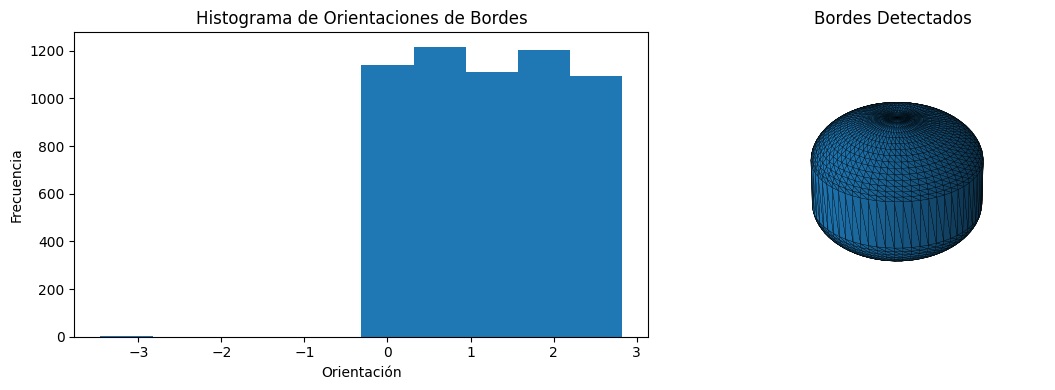

In [81]:
# Plotear los resultados
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Subplot 1: Histograma de orientaciones de bordes
ax1.bar(bins[:-1], hist, width=np.pi/5)
ax1.set_xlabel('Orientación')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Histograma de Orientaciones de Bordes')

# Subplot 2: Bordes detectados
ax2.plot_trisurf(malla.vertices[:, 0], malla.vertices[:, 1], malla.vertices[:, 2],
                 triangles=malla.faces, edgecolor='k', linewidth=0.2)
ax2.set_title('Bordes Detectados')
ax2.axis('off')

plt.tight_layout()
plt.show()

## 19. Descriptores basados en puntos de muestreo

Estos descriptores utilizan puntos de muestreo distribuidos en la superficie del objeto tridimensional para caracterizar su forma. Pueden incluir medidas como la distancia promedio entre puntos de muestreo, la variabilidad de la distancia entre puntos de muestreo, entre otros.

In [82]:
# 1. Cargar la malla tridimensional utilizando Trimesh.
malla = trimesh.creation.icosahedron()

# 2. Generar puntos de muestreo en la superficie de la malla.
num_puntos = 100  # Número de puntos de muestreo
puntos_muestreo, _ = trimesh.sample.sample_surface_even(malla, num_puntos)

# 3. Calcular las medidas de interés utilizando los puntos de muestreo.
distancias = puntos_muestreo[:, None, :] - puntos_muestreo[None, :, :]
distancias = np.linalg.norm(distancias, axis=-1)

distancia_promedio = np.mean(distancias)
variabilidad_distancia = np.std(distancias)

# 4. Utilizar los valores obtenidos como descriptores de forma para la malla tridimensional.
descriptores_forma = {
    'Distancia Promedio': distancia_promedio,
    'Variabilidad de Distancia': variabilidad_distancia
}

# 5. Imprimir los descriptores de forma.
for descriptor, valor in descriptores_forma.items():
    print(f'{descriptor}: {valor}')

Distancia Promedio: 1.138983121042015
Variabilidad de Distancia: 0.41045801220519335


## 20. Descriptores basados en autovectores



utilizan los autovectores de la matriz de covarianza de los puntos en la superficie del objeto tridimensional. Pueden incluir medidas como la orientación principal, la anisotropía, entre otros.


In [83]:
# 1. Cargar la malla tridimensional utilizando Trimesh.
malla = trimesh.creation.icosahedron()

# 2. Obtener los puntos de la malla.
puntos = malla.vertices

# 3. Calcular la matriz de covarianza de los puntos.
matriz_cov = np.cov(puntos, rowvar=False)

# 4. Calcular los autovectores y autovalores de la matriz de covarianza.
autovalores, autovectores = np.linalg.eig(matriz_cov)

# 5. Utilizar los autovectores y autovalores como descriptores de forma.
descriptores_forma = {
    'Orientación Principal': autovectores[:, 0],
    'Anisotropía': 1.0 - (autovalores[1] / autovalores[0])
}

# 6. Imprimir los descriptores de forma.
for descriptor, valor in descriptores_forma.items():
    print(f'{descriptor}: {valor}')

Orientación Principal: [1. 0. 0.]
Anisotropía: 1.1102230246251565e-16


## 21. Descriptores basados en NN

Cargar la malla tridimensional utilizando Trimesh.
Convertir la malla en un formato adecuado para el modelo de red neuronal, como un volumen 3D o una representación de malla compatible con la entrada del modelo.
Definición del modelo:

Crear o cargar un modelo de red neuronal pre-entrenado que sea adecuado para extraer características de forma.
Asegurarse de que el modelo acepte la entrada en el formato preparado en el paso anterior.
Extracción de características:

Pasar la malla o el volumen 3D a través del modelo de red neuronal para obtener las características de forma.
Recopilar las características de salida relevantes del modelo.
Utilización de los descriptores de forma:

Utilizar las características obtenidas como descriptores de forma para el objeto tridimensional.
Realizar análisis adicional o comparaciones utilizando los descriptores de forma, según sea necesario.

In [84]:
import trimesh
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Cargar la malla 3D utilizando Trimesh
malla = trimesh.creation.icosahedron()

# Obtener los vértices de la malla
vertices = malla.vertices



# Definir los descriptores de forma (etiquetas) según tu criterio
descriptores = np.random.rand(len(vertices), 10)  # Ejemplo: descriptores aleatorios



# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(vertices, descriptores, test_size=0.2, random_state=42)

# Definir la arquitectura de la red neuronal
modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_dim=3))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(10, activation='linear'))  # 10 neuronas de salida correspondientes a los descriptores

# Compilar el modelo
modelo.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar la red neuronal
modelo.fit(X_train, y_train, epochs=10, batch_size=32, verbose='auto')

# Evaluar el modelo con el conjunto de prueba
puntuacion = modelo.evaluate(X_test, y_test)

# Obtener los descriptores para una nueva malla
nueva_malla = trimesh.creation.icosphere()
nuevos_vertices = nueva_malla.vertices




nuevos_descriptores = modelo.predict(nuevos_vertices)

# Imprimir los descriptores obtenidos
print("nuevos descriptores: ",len(nuevos_descriptores))


Epoch 1/10
1/1 [==============================] - 1s 809ms/step - loss: 0.4403
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4291
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4183
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 0.4081
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3983
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3890
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3801
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3715
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3632
Epoch 10/10
21/21 [==============================] - 0s 2ms/step
nuevos descriptores:  642


##HKS Heat kernel signature
El descriptor HKS (Heat Kernel Signature) es un método utilizado para caracterizar la forma de una malla tridimensional mediante la propagación de una señal de calor a lo largo de la malla., donde el LBO captura variaciones locales.


Paso 1: Obtener la matriz de Laplace-Beltrami donde primero necesitamos calcular las cotangentes de los ángulos en cada una de las caras de la malla. Luego, podemos construir la matriz de cotangentes y, finalmente, la matriz de Laplace-Beltrami. La matriz de Laplace-Beltrami se denota como $\mathbf{L}$.

Paso 2: Calcular los valores y vectores propios
Una vez que tenemos la matriz de Laplace-Beltrami, podemos calcular los valores y vectores propios correspondientes. Los valores propios se denotan como $\lambda_i$, donde $i$ va desde 0 hasta el número de vértices de la malla menos 1. Los vectores propios se denotan como $\mathbf{v}_i$.

Paso 3: Calcular el descriptor HKS
El descriptor HKS se calcula propagando una señal de calor inicial a través de la malla utilizando la ecuación:
$$
H K S(v, t)=\sum_{i=1}^N\left(\left(v_i^T \phi_i\right) \cdot e^{-\lambda_i t}\right)
$$

donde $t$ es el tiempo de difusión y $N$ es el número de vértices de la malla.

Paso 4: Normalizar el descriptor HKS
Finalmente, es común normalizar el descriptor HKS dividiendo cada valor por el valor máximo del descriptor en el conjunto de vértices de la malla.

In [85]:
!pip install polyscope robust_laplacian

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.1/390.1 kB 16.4 MB/s eta 0:00:00


In [86]:
import robust_laplacian
import scipy.sparse.linalg as sla
import polyscope as ps
from scipy.sparse.linalg import eigsh

# Cargar la malla 3D utilizando Trimesh
malla = trimesh.creation.icosphere()
# Obtener los vértices de la malla
verts = malla.vertices
# Obtener las caras de la malla
faces = malla.faces


#1. laplaciano por laplace beltrami
L, M = robust_laplacian.mesh_laplacian(np.array(verts), np.array(faces))
#laplaciano y mat. de masa

#2.  Compute some eigenvectors
k=100
valores_propios, vectores_propios = eigsh(L, k=k, M=M, which='LM')

#3. Definir los parámetros para el descriptor HKS
tiempo_difusion = 0.1

# Calcular el descriptor HKS para cada vértice
hks = np.zeros(len(malla.vertices))
for i in range(len(malla.vertices)):
    for j in range(len(valores_propios)):
        hks[i] += np.exp(-valores_propios[j] * tiempo_difusion) * vectores_propios[i, j] * vectores_propios[i, j]

#4. Normalizar el descriptor HKS
hks /= np.max(hks)
print(hks.shape)
# Plotear la malla con la representación de color según el descriptor HKS
malla.visual.vertex_colors = trimesh.visual.interpolate(hks, color_map='jet')
malla.show()

(642,)


##WKS wake kernel signature
 WKS es un descriptor de forma que se basa en la propagación de ondas en la malla. Calcula la respuesta de una onda inicial en cada vértice de la malla a medida que se propaga a lo largo del tiempo. El descriptor WKS se utiliza para capturar información sobre las propiedades de la forma en términos de la propagación de ondas y puede revelar características como la curvatura, la forma global y las características distintivas de la malla.
aprox, con factor suavizado 1
$$
W K S(v, \sigma)=\sum_{i=1}^N\left(\left(v_i^T \phi_i\right) \cdot e^{-\left (\left(\log \left(\lambda_i\right)-\log (E)\right)^2 \right)}\right)
$$

- $v$ representa un vértice específico.
- $v_i$ son los elementos del autovector correspondiente al vértice $v$.
- $\phi_i$ son los autovectores.
- $\lambda_i$ son los autovalores correspondientes a los autovectores.
- $E$ es el valor de energía específico utilizado en el descriptor WKS.
- $\sigma$ es el parámetro de suavizado utilizado en el descriptor WKS, obtenido sobre la energia especifica

In [87]:
import robust_laplacian
import scipy.sparse.linalg as sla
import polyscope as ps
from scipy.sparse.linalg import eigsh

# Cargar la malla 3D utilizando Trimesh
malla = trimesh.creation.icosphere()
# Obtener los vértices de la malla
verts = malla.vertices
# Obtener las caras de la malla
faces = malla.faces

#1. Laplaciano por Laplace-Beltrami
L, M = robust_laplacian.mesh_laplacian(np.array(verts), np.array(faces))

#2. Calcular los valores y vectores propios
k = 100  # Número de valores y vectores propios a calcular
valores_propios, vectores_propios = eigsh(L, k=k, M=M, which='LM')

#3. Definir los parámetros para el descriptor WKS
variance=6
# log_e = np.log(np.maximum(np.abs(valores_propios), 1e-6))
energies = variance*np.log(0.01) #np.linspace(log_e[1], log_e[-1]/1.02, 2)
# Calcular el descriptor WKS para cada vértice
wks = np.zeros(len(malla.vertices))
for i in range(len(malla.vertices)):
    for j in range(len(valores_propios)):
      wks[i] += np.exp(-(np.log(valores_propios[j]) ** 2) - (energies)) * vectores_propios[i, j] * vectores_propios[i, j]

#4. Normalizar el descriptor WKS
wks /= np.max(wks, axis=0)

# Plotear la malla con la representación de color según el descriptor HKS
malla.visual.vertex_colors = trimesh.visual.interpolate(wks, color_map='jet')
malla.show()

In [88]:
print(wks.shape)

(642,)


#Ajuste y Regularizador
 Aplicar restricciones o penalizaciones adicionales a los descriptores de forma con el fin de mejorar la calidad y consistencia de la correspondencia. La regularización ayuda a evitar soluciones excesivamente complejas o incoherentes al introducir una forma de suavizado o restricción en los descriptores.

La regularización busca encontrar un equilibrio entre ajustar los descriptores a los datos observados y mantener la coherencia y suavidad en la correspondencia. Al aplicar regularización, se introducen ciertas suposiciones o preferencias en el proceso de correspondencia para garantizar que los resultados sean más coherentes y confiables.

Regularización espacial: para promover una correspondencia suave y coherente entre los vértices de las dos mallas. Esto se logra penalizando las correspondencias que están muy lejos entre sí en el espacio 3D. Puedes utilizar funciones de penalización como la distancia euclidiana o la diferencia de coordenadas para cuantificar la discrepancia espacial.

Regularización de la vecindad: considerar la información de vecindad local de los vértices para regularizar la correspondencia. Esto implica penalizar las correspondencias que rompen la continuidad topológica o la coherencia de la estructura vecinal de las mallas. Puedes utilizar medidas como la distancia entre vecinos o la diferencia en el número de vecinos para imponer restricciones de vecindad.

Regularización basada en características: Si las mallas tienen características específicas, como puntos de interés o regiones distintivas, puedes utilizar una regularización basada en características para favorecer las correspondencias entre esas características. Esto se puede lograr mediante la asignación de pesos o penalizaciones más bajas a las correspondencias que involucran características coincidentes.

Regularización basada en la forma global: Puedes utilizar información global de la forma, como momentos invariantes, características globales de curvatura o información de histograma, para regularizar la correspondencia. Esto ayuda a capturar la estructura global y las propiedades de la forma en lugar de depender únicamente de la información local.

Regularización basada en la simetría: Si las formas son simétricas, puedes utilizar la simetría como regularizador. Esto implica penalizar las correspondencias que rompen la simetría o favorecer las correspondencias que mantienen la simetría.

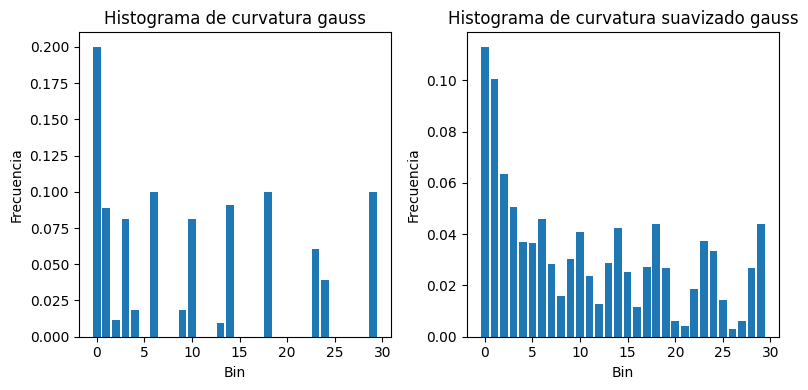

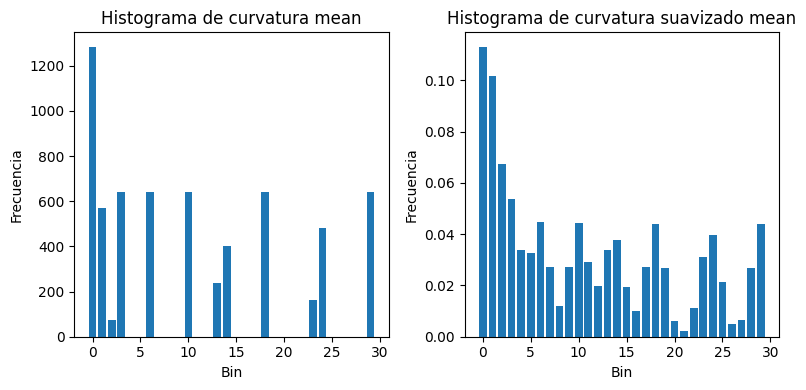

In [89]:
def RegHcurv(hgauss,hmean):
  # Parámetro de suavizado
  sigma = 1.0

  # Aplicar suavizado al histograma utilizando convolución con un kernel gaussiano
  kernel = np.exp(-0.5 * (np.arange(-3, 4) / sigma)**2)  # Kernel gaussiano (ejemplo)
  Rhgauss = np.convolve(hgauss, kernel, mode='same')
  Rhmean = np.convolve(hmean, kernel, mode='same')
  # Normalizar el histograma suavizado
  Rhgauss /= np.sum(Rhgauss)
  Rhmean /= np.sum(Rhmean)
  return Rhgauss,Rhmean

hgauss,hmean = Hcurv(trimesh.creation.icosphere())
Rhgauss,Rhmean = RegHcurv(hgauss,hmean)

# Visualizar los histogramas
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(range(len(hgauss)), hgauss)
plt.title('Histograma de curvatura gauss')
plt.xlabel('Bin')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
plt.bar(range(len(Rhgauss)), Rhgauss)
plt.title('Histograma de curvatura suavizado gauss')
plt.xlabel('Bin')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Visualizar los histogramas
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(range(len(hmean)), hmean)
plt.title('Histograma de curvatura mean')
plt.xlabel('Bin')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
plt.bar(range(len(Rhmean)), Rhmean)
plt.title('Histograma de curvatura suavizado mean')
plt.xlabel('Bin')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [90]:
#del descriptor por caracteristicas regularizas los momentos de inercia
from sklearn.preprocessing import StandardScaler

df = np.array(CaractForm(trimesh.creation.icosahedron()))
df2=df[12,1]
scaler = StandardScaler()
scaler.fit(df2)
df_norm = scaler.transform(df2)
df[12,1]=df_norm

print(df)


[['N. Euler' 2]
 ['Área' 9.574541383273937]
 ['Volumen' 2.5361507101204097]
 ['Compactness' 1.2065670268765905]
 ['Perímetro' -8.881784197001252e-16]
 ['Rugosidad' 1.7320508075688772]
 ['Circularidad' 1.5252021578003116e+32]
 ['Esfericidad' 0.9393256515676363]
 ['Diámetro' 1.70130161670408]
 ['Excentricidad' 1.0]
 ['Humedad' 2.094427190999916]
 ['Orientación' array([[1., 0., 0.],
                       [0., 1., 0.],
                       [0., 0., 1.]])]
 ['Momentos de Inercia' array([[ 1.41421356, -0.70710678, -0.70710678],
                               [-0.70710678,  1.41421356, -0.70710678],
                               [-0.70710678, -0.70710678,  1.41421356]])]]
